In [ ]:
#Load libraries
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

#Load data
X, y = load_boston(return_X_y=True)

#Create data frame
boston = load_boston()
columns = boston.feature_names
df = pd.DataFrame(X, columns = columns)

In [ ]:
#df.describe()

df_1 = df[['TAX', 'B']]
df_2 = df[['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO','LSTAT']]
df_3 = df[['CHAS', 'NOX']]

ax = sns.boxplot(data=df_2, orient="h", palette="Set2")

In [ ]:

ax = sns.boxplot(x=df["CRIM"])
ax.set_xlabel('Crime rate per capita')

In [ ]:
#Tukey's method
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss

In [ ]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "CRIM")
print(probable_outliers_tm)

In [ ]:
print(possible_outliers_tm)

In [ ]:
#Transform 'CRIM' to log 
log_CRIM = np.log(df['CRIM'])
df['CRIM_man'] = df['CRIM']+1
log_CRIM = np.log(df['CRIM_man'])
df['CRIM_log'] = log_CRIM

#Plot
sns.distplot(df['CRIM_log'])

#Calculate probable and possible outliers using log-iq method
probable_outliers_logiq, possible_outliers_logiq = tukeys_method(df, 'CRIM_log')
print(probable_outliers_logiq)
print(possible_outliers_logiq)

In [ ]:
#Internally studentized method (z-score)
def z_score_method(df, variable_name):
    #Takes two parameters: dataframe & variable of interest as string
    columns = df.columns
    z = np.abs(stats.zscore(df))
    threshold = 3
    outlier = []
    index=0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index = item
    for i, v in enumerate(z[:, index]):
        if v > threshold:
            outlier.append(i)
        else:
            continue
    return outlier

outlier_z = z_score_method(df, 'CRIM')
print(outlier_z)
# [380, 398, 404, 405, 410, 414, 418, 427]

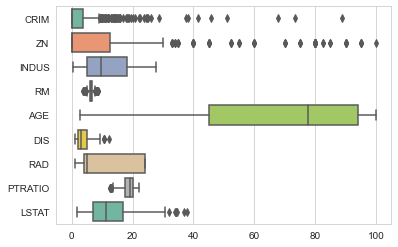

In [2]:
#df.describe()

df_1 = df[['TAX', 'B']]
df_2 = df[['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO','LSTAT']]
df_3 = df[['CHAS', 'NOX']]

ax = sns.boxplot(data=df_2, orient="h", palette="Set2")

Text(0.5, 0, 'Crime rate per capita')

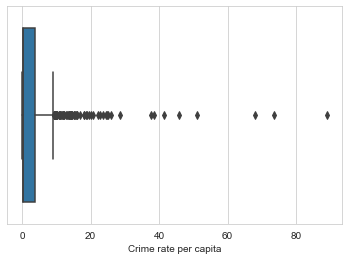

In [3]:

ax = sns.boxplot(x=df["CRIM"])
ax.set_xlabel('Crime rate per capita')

In [4]:
#Tukey's method
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss

In [5]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "CRIM")
print(probable_outliers_tm)

[374, 375, 376, 378, 379, 380, 381, 384, 385, 386, 387, 398, 400, 403, 404, 405, 406, 410, 412, 413, 414, 415, 417, 418, 425, 427, 437, 440, 468, 477]


In [6]:
print(possible_outliers_tm)

[367, 371, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 384, 385, 386, 387, 388, 392, 394, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 422, 425, 426, 427, 429, 431, 434, 435, 436, 437, 438, 439, 440, 441, 443, 444, 445, 447, 448, 454, 468, 469, 477, 478, 479]


D:\Soft\Anaconda3\envs\DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]
[380, 404, 405, 410, 414, 418]


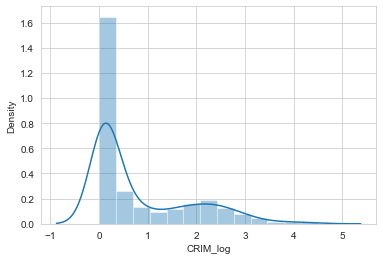

In [7]:
#Transform 'CRIM' to log 
log_CRIM = np.log(df['CRIM'])
df['CRIM_man'] = df['CRIM']+1
log_CRIM = np.log(df['CRIM_man'])
df['CRIM_log'] = log_CRIM

#Plot
sns.distplot(df['CRIM_log'])

#Calculate probable and possible outliers using log-iq method
probable_outliers_logiq, possible_outliers_logiq = tukeys_method(df, 'CRIM_log')
print(probable_outliers_logiq)
print(possible_outliers_logiq)

In [8]:
#Internally studentized method (z-score)
def z_score_method(df, variable_name):
    #Takes two parameters: dataframe & variable of interest as string
    columns = df.columns
    z = np.abs(stats.zscore(df))
    threshold = 3
    outlier = []
    index=0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index = item
    for i, v in enumerate(z[:, index]):
        if v > threshold:
            outlier.append(i)
        else:
            continue
    return outlier

outlier_z = z_score_method(df, 'CRIM')
print(outlier_z)
# [380, 398, 404, 405, 410, 414, 418, 427]

InvalidIndexError: (slice(None, None, None), 0)